# Priority scheduling (non-preemptive) scheduling algorithm
## Pasco, Jericho C.
## Salde, Stella Marie

In [1]:
import matplotlib.pyplot as plt

In [2]:
# Priority Scheduling Function (Non-preemptive)
def priority(process_list):
    time = 0
    gantt = []
    completed = {}
    process_timeline = []

    total_waiting_time = 0
    total_turn_around_time = 0

    while process_list:
        # Filter processes that have arrived
        available = [process for process in process_list if process[3] <= time]

        # If no process is available, increment time and continue
        if not available:
            time += 1
            gantt.append("Idle")
            continue

        # Sort available processes by priority (lower value = higher priority)
        available.sort()
        process = available[0]

        # Remove the selected process from the list
        process_list.remove(process)

        # Process details
        process_id = process[1]
        burst_time = process[2]
        arrival_time = process[3]

        # Update time and calculate metrics
        process_start_time = time
        time += burst_time
        completion_time = time
        turn_around_time = completion_time - arrival_time
        waiting_time = turn_around_time - burst_time

        # Record completion details
        completed[process_id] = [completion_time, turn_around_time, waiting_time]
        process_timeline.append((process_id, process_start_time, burst_time))

        gantt.append(process_id)
        total_waiting_time += waiting_time
        total_turn_around_time += turn_around_time

    # Calculate averages
    avg_waiting_time = total_waiting_time / len(completed)
    avg_turnaround_time = total_turn_around_time / len(completed)

    return gantt, completed, process_timeline, avg_waiting_time, avg_turnaround_time

In [3]:
# Gantt Chart Plotting Function
def plot_gantt_chart(process_timeline, completed):
    # Calculate total time as the completion time of the last process
    total_time = max(start + duration for _, start, duration in process_timeline)
    
    fig, ax = plt.subplots(figsize=(10, 3))
    
    for process_id, start, duration in process_timeline:
        ax.broken_barh([(start, duration)], (10, 9), facecolors=('tab:blue'))
        ax.text(start + duration / 2, 15, process_id, ha='center', va='center', color='white')
        
        # Add a vertical line at the completion time
        completion_time = start + duration
        ax.axvline(completion_time, color='red', linestyle='--')
        ax.text(completion_time, 20, f'{completion_time}', ha='center', va='bottom', color='red')

    ax.set_ylim(5, 25)
    ax.set_xlim(0, total_time)
    ax.set_xlabel("Time")
    ax.set_yticks([])
    ax.set_title("Gantt Chart for Priority Scheduling (Non-preemptive) with Completion Times")

    plt.show()

In [4]:
process_list = [[5, "A", 8, 0], [4, "B", 4, 3], [1, "C", 5, 4], [2, "D", 3, 6], [3, "E", 2, 10]]

In [5]:
gantt, completed, process_timeline, avg_waiting_time, avg_turnaround_time = priority(process_list)

In [6]:
# Display Gantt Chart and completion details
for i in range(1, len(completed) + 1):
    gantt_display = " | ".join(gantt[:i])
    print(gantt_display)
    
    # Display completion times for each process up to the current one
    completion_time_display = " | ".join(
        f"{completed[process_id][0]}" for process_id in list(completed.keys())[:i]
    )
    print(completion_time_display)
    print()  # For readability

A
8

A | C
8 | 13

A | C | D
8 | 13 | 16

A | C | D | E
8 | 13 | 16 | 18

A | C | D | E | B
8 | 13 | 16 | 18 | 22



In [7]:
print("Average Waiting Time:", avg_waiting_time)
print("Average Turn Around Time:", avg_turnaround_time)

Average Waiting Time: 6.4
Average Turn Around Time: 10.8


In [8]:
print("Completed Processes with Details:")
for process_id, details in completed.items():
    print(f"Process {process_id}: Completion Time = {details[0]}, Turn Around Time = {details[1]}, Waiting Time = {details[2]}")

Completed Processes with Details:
Process A: Completion Time = 8, Turn Around Time = 8, Waiting Time = 0
Process C: Completion Time = 13, Turn Around Time = 9, Waiting Time = 4
Process D: Completion Time = 16, Turn Around Time = 10, Waiting Time = 7
Process E: Completion Time = 18, Turn Around Time = 8, Waiting Time = 6
Process B: Completion Time = 22, Turn Around Time = 19, Waiting Time = 15


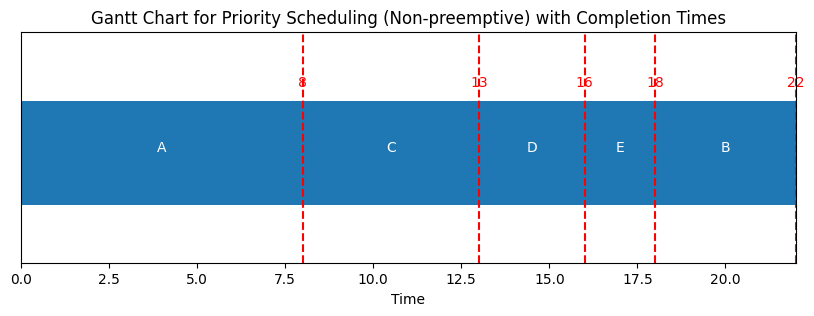

In [9]:
# Plot the Gantt chart
plot_gantt_chart(process_timeline, completed)